<a href="https://colab.research.google.com/github/sengorajkumar/machinehack-github-issues-classification/blob/main/github_issues_classification_V1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.text import *
import torch
import fastai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fastai.__version__

'1.0.61'

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
#import commands
#print(commands.getoutput('nvidia-smi'))

In [ ]:
defaults.device

device(type='cuda')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/ml/github'
train = pd.read_json('/content/drive/My Drive/ml/github/embold_train.json')
test = pd.read_json('/content/drive/My Drive/ml/github/embold_test.json')
train_extra = pd.read_json('/content/drive/My Drive/ml/github/embold_train_extra.json')

Labels:
* Bug - 0
* Feature - 1
* Question - 2

In [ ]:
(train_extra.info(), train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   300000 non-null  object
 1   body    300000 non-null  object
 2   label   300000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   150000 non-null  object
 1   body    150000 non-null  object
 2   label   150000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


(None, None)

In [ ]:
train = pd.concat([train, train_extra], axis=0)
train.reset_index(drop=True)

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0
...,...,...,...
449995,shield against invalid dates,makes'em crash the renderer for now :|\r \r da...,0
449996,fix the knight,"seriously, if you do just one thing this week...",0
449997,"portaudio playback binding crashes often, ubun...",appear to be very unstable. relates to 17,0
449998,add --db-path option for allowing user to spec...,add --db-path option with default value as ...,1


In [ ]:
#train["text"] = train["title"] + train["body"]

train["text"] = train[['title', 'body']].agg(' '.join, axis=1)
train = train.drop(['title', 'body'], axis=1)


In [ ]:
train.head()

,label,text
0,1,y-zoom piano roll a y-zoom on the piano roll w...
1,0,buggy behavior in selection ! screenshot from ...
2,1,"auto update feature hi,\r \r great job so far,..."
3,1,filter out noisy endpoints in logs i think we ...
4,0,enable pid on / pid off alarm actions for ardu...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450000 entries, 0 to 299999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   450000 non-null  int64 
 1   text    450000 non-null  object
dtypes: int64(1), object(1)
memory usage: 10.3+ MB


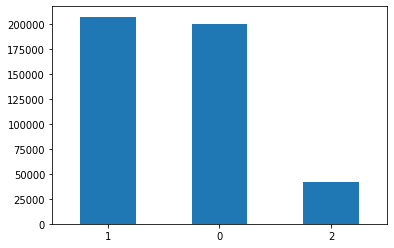

In [ ]:
train['label'].value_counts().plot.bar(rot=0);


# Input pre processing 

### Reference
* 6 Practices to enhance the performance of a Text Classification Model - https://www.analyticsvidhya.com/blog/2015/10/6-practices-enhance-performance-text-classification-model/







1.   STEP 1

> *  Remove urls
*   Remove special characters
* Remove white **spaces**




In [ ]:
import re
def remove_url(text):
# function to remove urls
  return (re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',text))

def replace_r(text):
  return text.replace(' r ', ' ')

def remove_whitespace(text):
  return ' '.join(text.split())

def cleanString(text):
  return (re.sub('\W+',' ', text))

In [ ]:
train.dtypes

label     int64
text     object
dtype: object

In [ ]:
train.head()

,label,text
0,1,y-zoom piano roll a y-zoom on the piano roll w...
1,0,buggy behavior in selection ! screenshot from ...
2,1,"auto update feature hi,\r \r great job so far,..."
3,1,filter out noisy endpoints in logs i think we ...
4,0,enable pid on / pid off alarm actions for ardu...


In [ ]:
train['text'] = train['text'].apply(remove_url)
train['text'] = train['text'].str.replace("[^a-zA-Z]", " ")
#train['text'] = train['text'].apply(replace_r)
train['text'] = train['text'].apply(cleanString)
train['text'] = train['text'].apply(remove_whitespace)

In [ ]:
print(train.iloc[1668][1])

webview openurl ios hi i fount this code for android to open webview urls outside of the app r r r exports webviewloaded function args r var webview args object r var tnswebviewclient r android webkit webviewclient extend r shouldoverrideurlloading function view url r if url null url startswith https r console log url r utilitymodule openurl url r return true r else r return false r r r r if isandroid r webview android getsettings setdisplayzoomcontrols false r webview android getsettings setbuiltinzoomcontrols false r webview android setwebviewclient new tnswebviewclient r r r r r it works fine is there a way to do the same for ios r r thank you r


In [ ]:
train['text'] = train['text'].apply(replace_r)

In [ ]:
print(train.iloc[1668][1])

webview openurl ios hi i fount this code for android to open webview urls outside of the app r exports webviewloaded function args var webview args object var tnswebviewclient android webkit webviewclient extend shouldoverrideurlloading function view url if url null url startswith https console log url utilitymodule openurl url return true else return false r r if isandroid webview android getsettings setdisplayzoomcontrols false webview android getsettings setbuiltinzoomcontrols false webview android setwebviewclient new tnswebviewclient r r it works fine is there a way to do the same for ios r thank you r


In [ ]:
train.head()

,label,text
0,1,y zoom piano roll a y zoom on the piano roll w...
1,0,buggy behavior in selection screenshot from r
2,1,auto update feature hi r great job so far saen...
3,1,filter out noisy endpoints in logs i think we ...
4,0,enable pid on pid off alarm actions for arduin...


# 2. Step 2 - Remove stop words using NLTK


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
additional_words = ['r', 'hi','log', 'return', 'null','true', 'false', 'function', 'object','android','u','t','v','b','c','e','h','p']

In [ ]:
stop.extend(additional_words)

In [ ]:
train['text_without_stop'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
train.head()

,label,text,text_without_stop
0,1,y zoom piano roll a y zoom on the piano roll w...,zoom piano roll zoom piano roll would useful
1,0,buggy behavior in selection screenshot from r,buggy behavior selection screenshot
2,1,auto update feature hi r great job so far saen...,auto update feature great job far saenzramiro ...
3,1,filter out noisy endpoints in logs i think we ...,filter noisy endpoints logs think stop logging...
4,0,enable pid on pid off alarm actions for arduin...,enable pid pid alarm actions arduino tc expect...


In [ ]:
print(train.iloc[1668][1])
print(train.iloc[1668][2])

webview openurl ios hi i fount this code for android to open webview urls outside of the app r exports webviewloaded function args var webview args object var tnswebviewclient android webkit webviewclient extend shouldoverrideurlloading function view url if url null url startswith https console log url utilitymodule openurl url return true else return false r r if isandroid webview android getsettings setdisplayzoomcontrols false webview android getsettings setbuiltinzoomcontrols false webview android setwebviewclient new tnswebviewclient r r it works fine is there a way to do the same for ios r thank you r
webview openurl ios fount code open webview urls outside app exports webviewloaded args var webview args var tnswebviewclient webkit webviewclient extend shouldoverrideurlloading view url url url startswith https console url utilitymodule openurl url else isandroid webview getsettings setdisplayzoomcontrols webview getsettings setbuiltinzoomcontrols webview setwebviewclient new tnsw

## 3. Step 3 Remove non english words

In [ ]:
 nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
sent = "Io andiamo to the beach with my amico."
" ".join(w for w in nltk.wordpunct_tokenize(sent) \
         if w.lower() in words or not w.isalpha())

'Io to the beach with my .'

In [ ]:
train['text_without_stop'] = train['text_without_stop'].apply(lambda x: ' '.join(w for w in nltk.wordpunct_tokenize(x) \
              if w.lower() in words or not w.isalpha()))

In [ ]:
print(train.iloc[2])
print(train.iloc[4])

label                                                                1
text                 auto update feature hi r great job so far saen...
text_without_stop    auto update feature great job far auto update ...
Name: 2, dtype: object
label                                                                0
text                 enable pid on pid off alarm actions for arduin...
text_without_stop    enable alarm behavior alarm enable disable har...
Name: 4, dtype: object


In [ ]:
train.head()

,label,text,text_without_stop
0,1,y zoom piano roll a y zoom on the piano roll w...,zoom piano roll zoom piano roll would useful
1,0,buggy behavior in selection screenshot from r,buggy behavior selection
2,1,auto update feature hi r great job so far saen...,auto update feature great job far auto update ...
3,1,filter out noisy endpoints in logs i think we ...,filter noisy think stop logging health
4,0,enable pid on pid off alarm actions for arduin...,enable alarm behavior alarm enable disable har...


In [ ]:
train = train.drop(['text'], axis=1)

In [ ]:
train = train.rename(columns={'text_without_stop': 'text'})

In [ ]:
train.head()

,label,text
0,1,zoom piano roll zoom piano roll would useful
1,0,buggy behavior selection
2,1,auto update feature great job far auto update ...
3,1,filter noisy think stop logging health
4,0,enable alarm behavior alarm enable disable har...


In [ ]:
print("Cuda available" if torch.cuda.is_available() is True else "CPU")

Cuda available


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(train, stratify = train['label'], test_size = 0.2)
df_trn.shape, df_val.shape

((360000, 2), (90000, 2))

In [ ]:
df_val

,label,text
112098,0,searching inconsistently everything subset ver...
252524,0,free water add one lanolin grid remove get wat...
131840,2,use sign currently hard l user access page log...
246923,1,provide version first thanks massive amount ef...
205688,2,add mock example read hey lately struggling re...
...,...,...
135415,1,add new available site please help add
182714,1,send selection apparently configure certain se...
128094,1,default use input device name name starting in...
10122,1,launch introspection system effort already exp...


#Build Language Model and Classifier

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9003784477563140981, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1059481510935535132
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15273268759363578707
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15171177728
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5627010824180634553
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
xxbos unbound variable atlas according shadowy running pipeline like verbose pipeline name atlas library home scratch atlas output ko ko protocol default linear protocol default file project j master python egg cat random pipeline pyro pyro built level application calling start application command project j master bin verbose pipeline name atlas library home scratch atlas output ko ko protocol default linear protocol default file project j master python egg input,0
xxbos upstream connect error disconnect reset issue template title one line description description describe issue please detailed feature request please describe desired behaviour scenario would used want run example envoy docker pull envoy latest docker run envoy latest curl error upstream connect error disconnect reset optional relevant links extra documentation understand issue bug template title one line description description issue seen describe happening instead bug example envoy crash value returned,2
xxbos web l pass print multiple test web test test clear test web test test err error request recent call last file home secure build net line connection thread self handle client connection connection client address file home secure build line handle client connection handle file home secure build line handle select self server select file home secure build net line convert file home secure build net line create context,0
xxbos unable azure linked studio version f z os version x reproduce open linked use copy open button paste code login browser tried chrome edge listed successful message studio error account error entry found cache internal azure account multiple another account subscription everything works fine even though also got multiple access multiple program studio ode zone zone node alt used default offender grid zone load patch console anonymous program studio,0
xxbos dart crash list void foo l involved dart version dart compiler dart version pro local kernel version we d root release x x code void foo list foo l code rather different result list void foo l dart foo dart foo dart error find match list void foo l foo dart internal error compiler element compiler broken element compiler possible tell problem program regardless compiler crash dart team would,0


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 4.37E-02


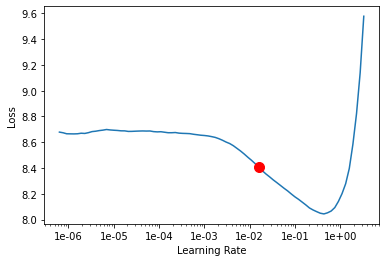

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

#Train the model

In [ ]:
learn.fit_one_cycle(10, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,6.137391,6.060410,0.107693,06:37
1,6.103877,6.050287,0.113062,06:41
2,6.139296,6.073666,0.112804,06:41
3,6.094208,6.035928,0.115987,06:40
4,6.077799,5.999069,0.118762,06:40
5,5.991538,5.943615,0.121726,06:40


Buffered data was truncated after reaching the output size limit.

In [ ]:
learn.predict("this is not working", n_words=10)

'this is not working correctly get annoying yesterday ago extension request far expensive good'

In [ ]:
learn.save_encoder('ft_enc_v2')

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc_v2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (360000 items)
x: TextList
xxbos invalid output found output tagged template incorrect example next folder issue seen reason think next issue rather incorrect output happen outside directory see custom next treating directory differently also never problem use tagged successfully many thanks help interesting tool,xxbos swagger generation issue request version got interface concrete class serialization class class public interface string public class private final string bar public string xxwrep 4 bar public string returned controller method swagger good value method post public package new type bar type string however taken none value method post public string package type reason like example provided issue without however classes suffer issue used run example issue commit,xxbos can not disable logging version mobile used issue found native hybrid native smart sync example os version device reproduce edit level line always actual beh

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03
Min loss divided by 10: 5.25E-02


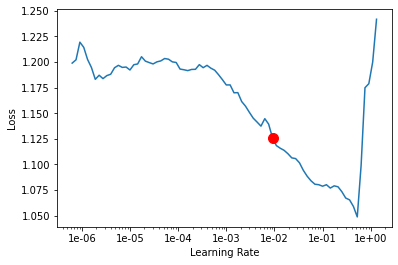

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(10, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.792535,0.691908,0.720822,04:46
1,0.767985,0.693039,0.721822,04:47
2,0.772864,0.699185,0.720333,04:47
3,0.771231,0.699756,0.714078,04:45
4,0.780486,0.694565,0.720156,04:47
5,0.781249,0.694706,0.725311,04:46
6,0.766104,0.674214,0.729211,04:47
7,0.748775,0.673078,0.727433,04:46


Buffered data was truncated after reaching the output size limit.

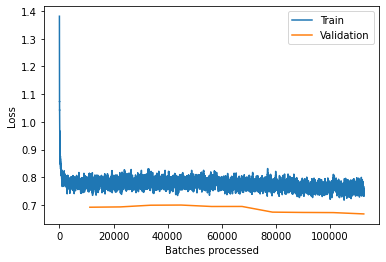

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(15, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.705409,0.637951,0.745311,05:42
1,0.691279,0.603271,0.762267,05:47
2,0.644879,0.602803,0.765078,05:49
3,0.683813,0.599508,0.767433,05:44
4,0.645787,0.616232,0.766889,05:44
5,0.650664,0.607480,0.767756,05:44
6,0.682806,0.594279,0.772467,05:46


Buffered data was truncated after reaching the output size limit.

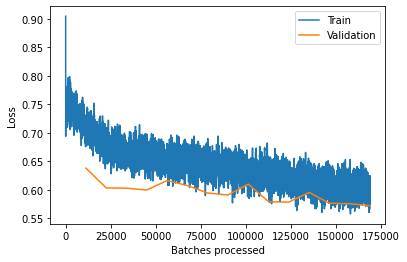

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(15, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.584811,0.569389,0.780189,11:44
1,0.571284,0.569584,0.781756,11:37
2,0.585076,0.572830,0.781856,11:44
3,0.585755,0.566810,0.784056,11:43


Buffered data was truncated after reaching the output size limit.

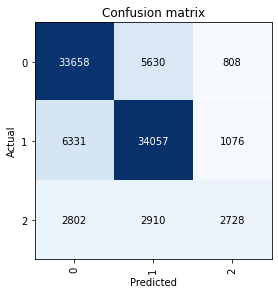

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()


In [ ]:
learn.predict("homebrew not working bug")

(Category tensor(0), tensor(0), tensor([0.8205, 0.0136, 0.1659]))

In [ ]:
learn.export()

In [ ]:
learn.export('/content/drive/My Drive/ml/github/ULMFiT_classifier_model_v2.pkl')


In [ ]:
my_path = learn.path

In [ ]:
my_path

PosixPath('.')

In [ ]:
my_learn = load_learner("/content/drive/My Drive/ml/github/", 'ULMFiT_classifier_model_v2.pkl')

In [ ]:
pred1 = my_learn.predict("When I run the application with 4 parameters it does not give me correct results")

In [ ]:
type(pred1)
print(pred1)

(Category tensor(0), tensor(0), tensor([0.4572, 0.2220, 0.3208]))


# **Prepare Test data to run prediction**

In [ ]:
test['body'] = test['body'].apply(remove_url)
#test['body'] = test['body'].astype('str') 
#test['body'] = test['body'].str.replace("\\r","")
test['body'] = test['body'].str.replace("[^a-zA-Z]", " ")
test['body'] = test['body'].apply(replace_r)
test['body'] = test['body'].apply(remove_whitespace)
test['title'] = test['title'].apply(remove_url)
test['title'] = test['title'].str.replace("[^a-zA-Z]", " ")
test['title'] = test['title'].apply(replace_r)
test['title'] = test['title'].apply(remove_whitespace)
test["text"] = test["title"] + test["body"]
test = test.drop(['title', 'body'], axis=1)

In [ ]:
test.head()

,text
0,config question path specific environment vari...
1,crash indien volde simulator crasht als hij vo...
2,unable to mine rockssarkasmo starting today wh...
3,not all whitelists are processedcreate followi...
4,add ctx menu for idafree and idafreeassociated...


In [ ]:
test['label'] = test['text'].apply(lambda row: str(my_learn.predict(row)[0]))

KeyboardInterrupt: ignored

In [ ]:
test

,text,label
0,config question path specific environment vari...,2
1,crash indien volde simulator crasht als hij vo...,0
2,unable to mine rockssarkasmo starting today wh...,0
3,not all whitelists are processedcreate followi...,0
4,add ctx menu for idafree and idafreeassociated...,1
...,...,...
29995,closing a project with running simulations doe...,1
29996,missing table description on db db iseries as ...,0
29997,cases when notification should be shownnew mes...,0
29998,ip errors in idea client when syncingi see the...,0


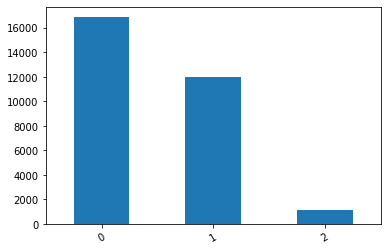

In [ ]:
test['label'].value_counts().plot.bar(rot=30);


In [ ]:
test.to_csv('/content/drive/My Drive/ml/github/submission_v2_Oct14.csv', columns=['label'], index=False)